#Project04_ML



---


## Library used


---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



---


##  Display dataset


---



In [ ]:
# Load the dataset
data = pd.read_csv("Dataset - Factors Influencing Technology Adoption in Consumer Households.csv")

# Set indexing
data = data.reset_index(drop=True)

# Print data
data

,Age,Gender,EducationLevel,HouseholdIncome,Frequency_LaptopDesktop,Frequency_Smartphone,Frequency_Tablet,Frequency_SmartHomeDevices,Frequency_WearableDevices,Frequency_GamingConsoles,...,Influence_PromoActivities,Influence_SocialPopularity,Influence_ExpertRecommendation,Influence_Endorsements,Barrier_HighPrice,Barrier_TechKnowledge,Barrier_PrivacySecurity,Barrier_ReliableInternet,Barrier_ChangeReluctance,LikelinessToRecommend
0,25,Female,Bachelor's Degree,1500000.0,4,5,0,4,0,0,...,3,5,4,2,3,4,4,3,4,4
1,48,Female,Bachelor's Degree,800000.0,3,5,5,4,5,2,...,4,4,4,2,2,4,4,4,4,5
2,49,Male,Master's Degree,30000000.0,4,4,0,2,0,0,...,3,3,3,1,5,5,5,3,4,3
3,38,Male,Bachelor's Degree,20000.0,1,0,1,1,1,2,...,2,3,3,2,1,3,2,3,2,3
4,45,Male,Bachelor's Degree,5000000.0,5,5,3,5,5,0,...,3,3,3,3,3,3,3,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,38,Female,Master's Degree,400000.0,5,5,3,3,4,3,...,3,4,3,3,2,1,2,2,2,2
103,25,Male,Bachelor's Degree,840000.0,4,5,3,0,2,0,...,3,3,4,2,3,1,2,1,4,2
104,46,Male,Master's Degree,10000000.0,4,5,3,5,0,0,...,5,4,1,1,4,2,5,2,1,3
105,58,Female,High School Graduate,11200000.0,5,5,0,0,5,0,...,1,1,1,1,3,2,4,1,1,5





---


This code is a comprehensive pipeline for regression analysis using various machine learning algorithms. It starts with data preprocessing, including handling missing values by dropping them and encoding categorical variables. Feature engineering is then performed to create new features related to the education-income ratio, education level categories, and education-income gradient.

Next, the dataset is split into training and testing sets, and the features are standardized. Seven regression models are defined, including Linear Regression, Ridge Regression, Decision Tree, Random Forest, Gradient Boosting, SVR, and XGBoost. Hyperparameter tuning is performed using GridSearchCV, and the best models are selected based on their performance metrics, such as RMSE and R-squared.

Feature importances are plotted for ensemble models, and predicted vs. actual values are visualized to evaluate model performance. Finally, the best-performing model is identified based on RMSE and R-squared scores, and its performance is further examined through visualizations. Overall, this code provides a systematic approach to regression analysis and model evaluation on the given dataset.

---



In [ ]:
# Handle missing values: Consider imputation techniques instead of dropping rows
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['EducationLevel'] = label_encoder.fit_transform(data['EducationLevel'])

# Define features and target variable
X = data.drop(columns=['HouseholdIncome'])

# Feature engineering
# Education-Income Ratio
X['Education_Income_Ratio'] = data['HouseholdIncome'] / (data['EducationLevel'] + 1)  # Adding 1 to avoid division by zero

# Education Level Categories
# Considering 5 categories: High school or less, Some college, Bachelor's degree, Master's degree, Doctorate
education_categories = ['High School or Less', 'Some College', "Bachelor's Degree", "Master's Degree", 'Doctorate']
X['Education_Level_Category'] = pd.cut(data['EducationLevel'], bins=[-1, 0, 1, 2, 3, 4], labels=education_categories, right=False)

# Education-Income Gradient
education_income_gradient = LinearRegression()
education_income_gradient.fit(data[['EducationLevel']], data['HouseholdIncome'])
X['Education_Income_Gradient'] = education_income_gradient.coef_[0] * data['EducationLevel']

# Split the dataset into training and testing sets
y = data['HouseholdIncome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode Education_Level_Category
X_train_encoded = pd.get_dummies(X_train, columns=['Education_Level_Category'])
X_test_encoded = pd.get_dummies(X_test, columns=['Education_Level_Category'])

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

# Define parameter grids for GridSearchCV
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 7, 9]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]},
    'SVR': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]}
}

# Perform k-fold cross-validation and hyperparameter tuning
best_models = {}
best_rmse = float('inf')
best_r2 = -float('inf')
best_model_name_rmse = None
best_model_name_r2 = None

for name, model in models.items():
    print(f"Training and tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate the model using RMSE and R-squared
    y_train_pred = grid_search.predict(X_train_scaled)
    y_test_pred = grid_search.predict(X_test_scaled)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"RMSE for {name} (train): {rmse_train}")
    print(f"RMSE for {name} (test): {rmse_test}")
    print(f"R-squared for {name} (train): {r2_train}")
    print(f"R-squared for {name} (test): {r2_test}")

    # Update best models based on RMSE and R-squared
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_model_name_rmse = name
    if r2_test > best_r2:
        best_r2 = r2_test
        best_model_name_r2 = name

    print()

# Print the best model based on RMSE and R-squared
print(f"The best model based on RMSE is: {best_model_name_rmse}, with RMSE: {best_rmse}")
print(f"The best model based on R-squared is: {best_model_name_r2}, with R-squared: {best_r2}")

# Plot feature importances from ensemble models ('Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost')
best_model = best_models[best_model_name_r2]
if best_model_name_r2 in ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost']:
    feature_importances = best_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print("\nTop 5 most important features:")
    print(importance_df.head())

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    print(importance_df)
    plt.barh(importance_df['Feature'][:5], importance_df['Importance'][:5], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top 5 Most Important Features')
    plt.gca().invert_yaxis()
    plt.show()

    # Plot predicted vs. actual values for the best model
    y_pred = best_model.predict(X_test_scaled)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
    plt.xlabel('Actual HouseholdIncome')
    plt.ylabel('Predicted HouseholdIncome')
    plt.title(f"{best_model_name_r2}: Predicted vs. Actual HouseholdIncome")
    plt.show()

# Print the best model
print(f"The best model overall is: {best_model_name_r2}")

Training and tuning Linear Regression...
Best parameters for Linear Regression: {}
RMSE for Linear Regression (train): 2479483.6925548925
RMSE for Linear Regression (test): 6755848.251736729
R-squared for Linear Regression (train): 0.7797193170678979
R-squared for Linear Regression (test): 0.6107718840288634

Training and tuning Ridge Regression...
Best parameters for Ridge Regression: {'alpha': 10}
RMSE for Ridge Regression (train): 2633867.573371757
RMSE for Ridge Regression (test): 4325447.989856208
R-squared for Ridge Regression (train): 0.7514339718630103
R-squared for Ridge Regression (test): 0.8404463951652683

Training and tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 3}
RMSE for Decision Tree (train): 1023577.8925957129
RMSE for Decision Tree (test): 5892010.631391444
R-squared for Decision Tree (train): 0.9624598765595684
R-squared for Decision Tree (test): 0.7039456302025727

Training and tuning Random Forest...
Best parameters for Random Forest: {



---


## As a result shows that the best model overall is: Ridge Regression. XGBoost model also has indicators that fits for this dataset.



---


## Visualize plot of the best model by predicted and actual values

---



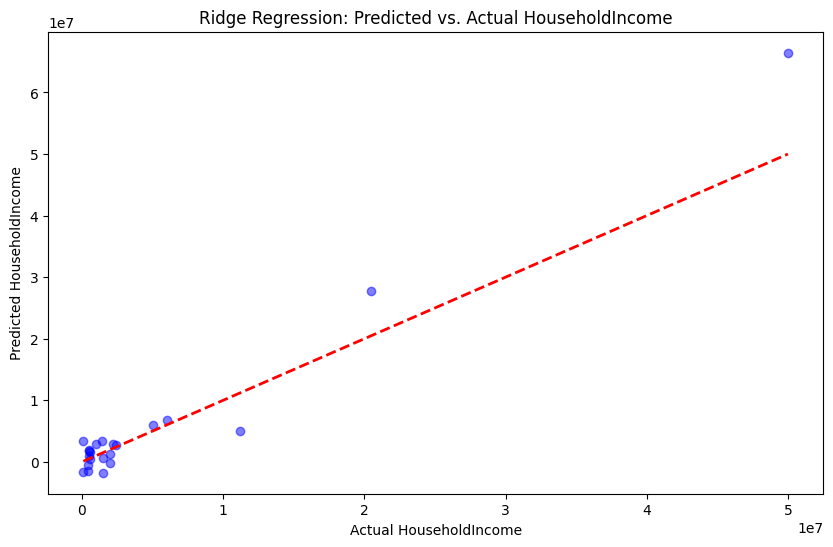

In [ ]:
# Plot predicted vs. actual values for the best model
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Actual HouseholdIncome')
plt.ylabel('Predicted HouseholdIncome')
plt.title(f"{best_model_name_r2}: Predicted vs. Actual HouseholdIncome")
plt.show()



---


# The whole code in one cell

---



Training and tuning Linear Regression...
Best parameters for Linear Regression: {}
RMSE for Linear Regression (train): 2479483.6925548925
RMSE for Linear Regression (test): 6755848.251736729
R-squared for Linear Regression (train): 0.7797193170678979
R-squared for Linear Regression (test): 0.6107718840288634

Training and tuning Ridge Regression...
Best parameters for Ridge Regression: {'alpha': 10}
RMSE for Ridge Regression (train): 2633867.573371757
RMSE for Ridge Regression (test): 4325447.989856208
R-squared for Ridge Regression (train): 0.7514339718630103
R-squared for Ridge Regression (test): 0.8404463951652683

Training and tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 9}
RMSE for Decision Tree (train): 22924.144548239718
RMSE for Decision Tree (test): 5878251.447727052
R-squared for Decision Tree (train): 0.999981170439724
R-squared for Decision Tree (test): 0.7053267241850331

Training and tuning Random Forest...
Best parameters for Random Forest: {'

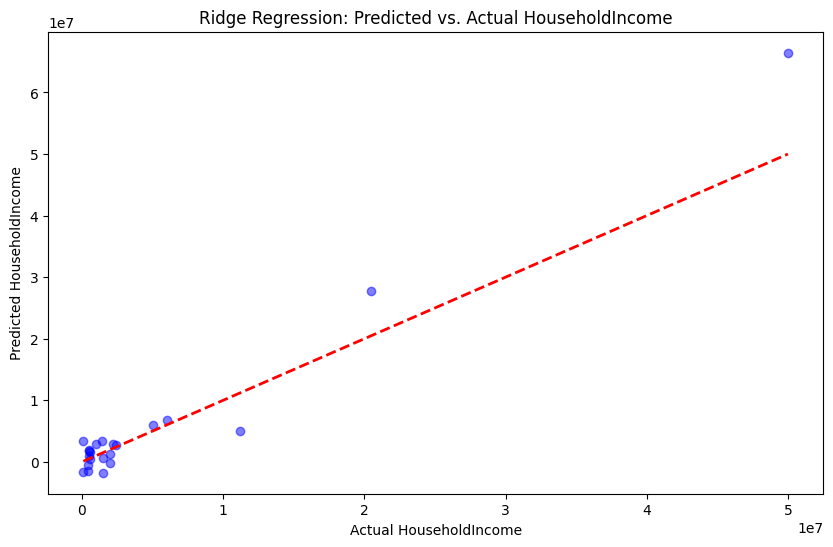

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Dataset - Factors Influencing Technology Adoption in Consumer Households.csv")

# Set indexing
data = data.reset_index(drop=True)

# Handle missing values: Consider imputation techniques instead of dropping rows
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['EducationLevel'] = label_encoder.fit_transform(data['EducationLevel'])

# Define features and target variable
X = data.drop(columns=['HouseholdIncome'])

# Feature engineering
# Education-Income Ratio
X['Education_Income_Ratio'] = data['HouseholdIncome'] / (data['EducationLevel'] + 1)  # Adding 1 to avoid division by zero

# Education Level Categories
# Considering 5 categories: High school or less, Some college, Bachelor's degree, Master's degree, Doctorate
education_categories = ['High School or Less', 'Some College', "Bachelor's Degree", "Master's Degree", 'Doctorate']
X['Education_Level_Category'] = pd.cut(data['EducationLevel'], bins=[-1, 0, 1, 2, 3, 4], labels=education_categories, right=False)

# Education-Income Gradient
education_income_gradient = LinearRegression()
education_income_gradient.fit(data[['EducationLevel']], data['HouseholdIncome'])
X['Education_Income_Gradient'] = education_income_gradient.coef_[0] * data['EducationLevel']

# Split the dataset into training and testing sets
y = data['HouseholdIncome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode Education_Level_Category
X_train_encoded = pd.get_dummies(X_train, columns=['Education_Level_Category'])
X_test_encoded = pd.get_dummies(X_test, columns=['Education_Level_Category'])

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

# Define parameter grids for GridSearchCV
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 7, 9]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]},
    'SVR': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]}
}

# Perform k-fold cross-validation and hyperparameter tuning
best_models = {}
best_rmse = float('inf')
best_r2 = -float('inf')
best_model_name_rmse = None
best_model_name_r2 = None

for name, model in models.items():
    print(f"Training and tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate the model using RMSE and R-squared
    y_train_pred = grid_search.predict(X_train_scaled)
    y_test_pred = grid_search.predict(X_test_scaled)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"RMSE for {name} (train): {rmse_train}")
    print(f"RMSE for {name} (test): {rmse_test}")
    print(f"R-squared for {name} (train): {r2_train}")
    print(f"R-squared for {name} (test): {r2_test}")

    # Update best models based on RMSE and R-squared
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_model_name_rmse = name
    if r2_test > best_r2:
        best_r2 = r2_test
        best_model_name_r2 = name

    print()

# Print the best model based on RMSE and R-squared
print(f"The best model based on RMSE is: {best_model_name_rmse}, with RMSE: {best_rmse}")
print(f"The best model based on R-squared is: {best_model_name_r2}, with R-squared: {best_r2}")

# Plot feature importances from ensemble models ('Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost')
best_model = best_models[best_model_name_r2]
if best_model_name_r2 in ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost']:
    feature_importances = best_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print("\nTop 5 most important features:")
    print(importance_df.head())

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    print(importance_df)
    plt.barh(importance_df['Feature'][:5], importance_df['Importance'][:5], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top 5 Most Important Features')
    plt.gca().invert_yaxis()
    plt.show()

    # Plot predicted vs. actual values for the best model
    y_pred = best_model.predict(X_test_scaled)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
    plt.xlabel('Actual HouseholdIncome')
    plt.ylabel('Predicted HouseholdIncome')
    plt.title(f"{best_model_name_r2}: Predicted vs. Actual HouseholdIncome")
    plt.show()

# Print the best model
print(f"The best model overall is: {best_model_name_r2}")

# Plot predicted vs. actual values for the best model
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Actual HouseholdIncome')
plt.ylabel('Predicted HouseholdIncome')
plt.title(f"{best_model_name_r2}: Predicted vs. Actual HouseholdIncome")
plt.show()
